# FP-Growth Algorithm for Web Usage Mining 


 ## Importing Already Preprocessed Data 

In [5]:
import pandas as pd
transactions = []
with open("../Data/extractedAndcleanedData/usersessions.csv", "r", encoding="utf8") as f:
    for line in f:
        parts = line.strip().split(",")
        parts = [p for p in parts if p != ""]
        transactions.append(parts)
transactions = [list(set(t)) for t in transactions]
noise = ["/images", "/icons", "/htbin"]

transactions_cleaned = [
    [item for item in t if item not in noise]
    for t in transactions
]

print("Number of transactions:", len(transactions_cleaned))
df=pd.DataFrame(transactions_cleaned)
print("Number of transactions:", len(transactions_cleaned))
print(transactions_cleaned[:10])


Number of transactions: 201965
Number of transactions: 201965
[['/history/apollo', '/history'], ['/shuttle/countdown', '/facilities'], ['/shuttle/missions/sts-73'], ['/shuttle/countdown/video'], ['/shuttle/countdown', '/shuttle/missions/sts-71/images'], ['/shuttle/countdown'], ['/shuttle/missions/51-l', '/shuttle/technology/sts-newsref'], ['/facts'], ['/shuttle/missions/sts-71/images'], ['/shuttle/countdown', '/shuttle/missions/sts-71/images']]


## One-hot encode transactions

In [12]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions_cleaned).transform(transactions_cleaned)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


## Applying the algorithm 

In [13]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(df_encoded, min_support=0.005, use_colnames=True)
print(frequent_itemsets)

from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, 
                          metric="confidence", 
                          min_threshold=0.5)

print(rules)



      support                                           itemsets
0    0.070963                                  (/history/apollo)
1    0.056252                                         (/history)
2    0.254311                               (/shuttle/countdown)
3    0.045448                                      (/facilities)
4    0.011101                         (/shuttle/missions/sts-73)
..        ...                                                ...
318  0.012522  (/shuttle/countdown, /shuttle/countdown/images...
319  0.005486  (/history/apollo/images, /shuttle/countdown, /...
320  0.007378  (/shuttle/countdown, /shuttle/missions/sts-70,...
321  0.005466  (/shuttle/countdown/lps/images, /shuttle/count...
322  0.006778  (/shuttle/missions/sts-70/news, /shuttle/missi...

[323 rows x 2 columns]
                                           antecedents  \
0                                    (/history/apollo)   
1    (/history/apollo/images, /history/apollo/apoll...   
2         (/history/ap

## Saving the frequent itemsets and association rules

In [ ]:
frequent_itemsets.to_csv("../Data/fp_growth/fp_frequent_itemsets.csv", index=False)
rules.to_csv("../Data/fp_growth/fp_rules.csv", index=False)


## Displaying the results

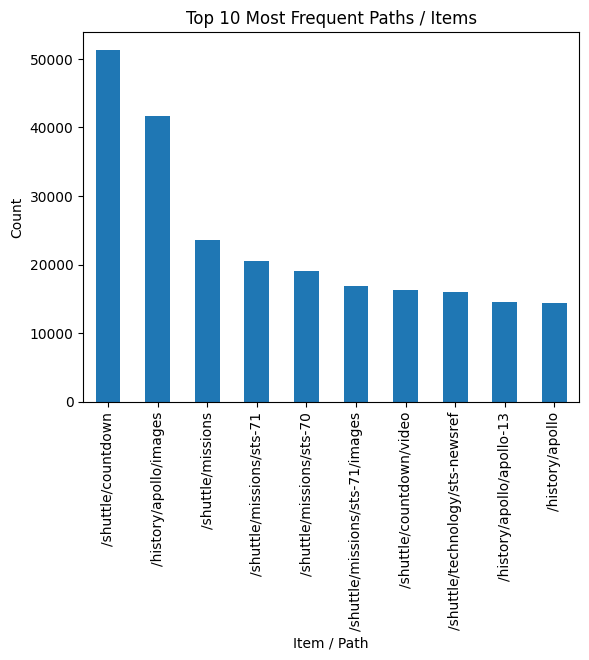

In [15]:
import matplotlib.pyplot as plt

all_items = df.values.flatten()  

all_items = [str(x) for x in all_items if str(x).strip() not in ["", "NA","None"]]

items_series = pd.Series(all_items)

top_items = items_series.value_counts().head(10)

top_items.plot(kind='bar', title='Top 10 Most Frequent Paths / Items')
plt.xlabel("Item / Path")
plt.ylabel("Count")
plt.show()

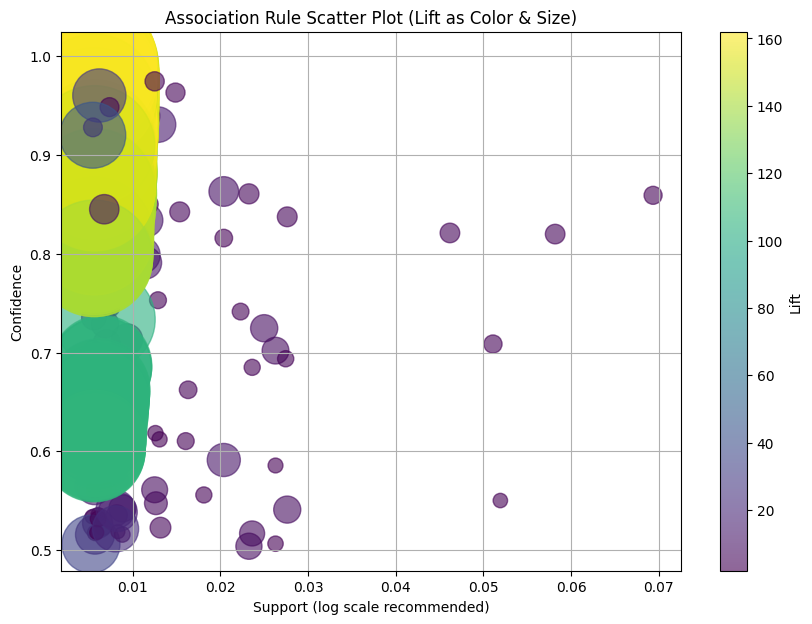

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.scatter(
    rules['support'],
    rules['confidence'],
    s=rules['lift'] * 50,  
    c=rules['lift'],
    cmap='viridis',
    alpha=0.6
)

plt.colorbar(label="Lift")
plt.xlabel("Support (log scale recommended)")
plt.ylabel("Confidence")
plt.title("Association Rule Scatter Plot (Lift as Color & Size)")
plt.grid(True)
plt.show()
